In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [24]:
data = pd.read_csv("dataset/heart_2022_with_nans.csv")
categorical_features = data.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_features

['State',
 'Sex',
 'GeneralHealth',
 'LastCheckupTime',
 'PhysicalActivities',
 'RemovedTeeth',
 'HadHeartAttack',
 'HadAngina',
 'HadStroke',
 'HadAsthma',
 'HadSkinCancer',
 'HadCOPD',
 'HadDepressiveDisorder',
 'HadKidneyDisease',
 'HadArthritis',
 'HadDiabetes',
 'DeafOrHardOfHearing',
 'BlindOrVisionDifficulty',
 'DifficultyConcentrating',
 'DifficultyWalking',
 'DifficultyDressingBathing',
 'DifficultyErrands',
 'SmokerStatus',
 'ECigaretteUsage',
 'ChestScan',
 'RaceEthnicityCategory',
 'AgeCategory',
 'AlcoholDrinkers',
 'HIVTesting',
 'FluVaxLast12',
 'PneumoVaxEver',
 'TetanusLast10Tdap',
 'HighRiskLastYear',
 'CovidPos']

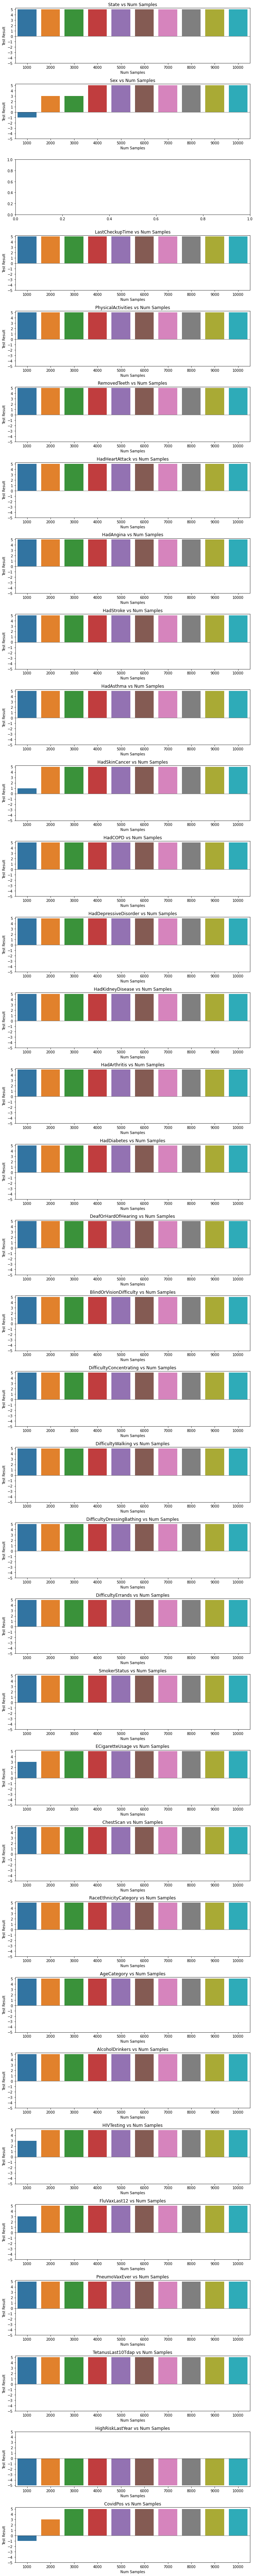

In [ ]:
def make_experiment_plots(sampling_technique,lower_bound,upper_bound,step_size):
    fig, axes = plt.subplots(len(categorical_features), 1, figsize=(10, 100))
    for i,categorical_feature in enumerate(categorical_features):
        if categorical_feature=='GeneralHealth':continue
        feature_output = []
        for num_samples in range(lower_bound,upper_bound,step_size):
            with open(f"output/stratified_sampling/{num_samples}/{categorical_feature}.txt", "r") as f:
                lines = f.readlines()
            every_4th_line = [float(lines[j].strip().split()[0]) for j in range(3, len(lines), 4)]
            feature_output.append(sum(every_4th_line))
        data = pd.DataFrame({'Num Samples': range(lower_bound,upper_bound,step_size), 'Test Result': feature_output})
        sns.barplot(ax=axes[i],x="Num Samples",y="Test Result", data = data)
        axes[i].set_yticks(range(-5,6))
        axes[i].axhline(0,color='black',linewidth=0.5)
        axes[i].set_title(f"{categorical_feature} vs Num Samples")
    plt.tight_layout()


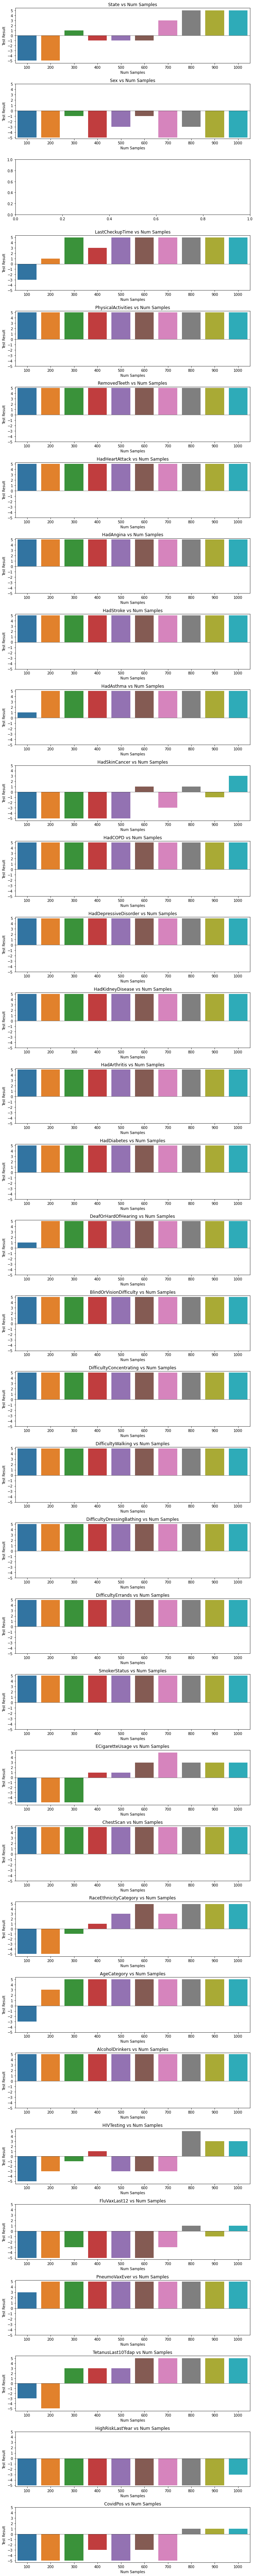

In [34]:
fig, axes = plt.subplots(len(categorical_features), 1, figsize=(10, 100))
for i,categorical_feature in enumerate(categorical_features):
    if categorical_feature=='GeneralHealth':continue
    feature_output = []
    for num_samples in range(100,1001,100):
        with open(f"output2/stratified_sampling/{num_samples}/{categorical_feature}.txt", "r") as f:
            lines = f.readlines()
        every_4th_line = [float(lines[j].strip().split()[0]) for j in range(3, len(lines), 4)]
        feature_output.append(sum(every_4th_line))
    data = pd.DataFrame({'Num Samples': range(100,1001,100), 'Test Result': feature_output})
    sns.barplot(ax=axes[i],x="Num Samples",y="Test Result", data = data)
    axes[i].set_yticks(range(-5,6))
    axes[i].axhline(0,color='black',linewidth=0.5)
    axes[i].set_title(f"{categorical_feature} vs Num Samples")
plt.tight_layout()
